In [5]:

import json
import random
import os
import glob

import logging

from transformers import AutoTokenizer
import matplotlib.pyplot as plt
import os
import numpy as np

model_path = ""
result_path = ""


tokenizer = AutoTokenizer.from_pretrained(model_path)
logging.basicConfig(level=logging.INFO,
                    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s')

logger = logging.getLogger(__name__)


def get_token_lengths(text):
    tokens = tokenizer.tokenize(text)
    return len(tokens)



def save_json(data, file_path):
    try:
        with open(file_path, 'w', encoding='utf-8') as file:
            json.dump(data, file, ensure_ascii=False, indent=4)
        print(f"Data successfully saved to {file_path}")
    except Exception as e:
        print(f"Failed to save data to {file_path}. Error: {e}")


def load_data_process(data_path,dataset):
    logger.info(f"Loading CSN data from {data_path}...")
    # file path is actually a directory
    all_samples = []
    id_ = 0

    logger.info(f"Loading dataset {data_path}...")
    
    with open(data_path, 'r', encoding='utf-8') as f:
        content = f.read() 
        dataset_samples = json.loads(content) 
    
    logger.info(f"Found {len(dataset_samples)} samples in {data_path}")
    # dataset_samples = [json.loads(d) for d in dataset_samples]

    all_samples = process_data_len(dataset_samples)
        
    return all_samples

def process_data_len(data):
    all_samples = []
    for entry in data:
        entry["target_docstring_length"] = get_token_lengths(entry["target_docstring"])
        entry["target_code_length"] = get_token_lengths(entry["target_code"])
        for rank in entry.get("top_ranked", []):
            rank["docstring_length"] = get_token_lengths(rank["docstring"])
            rank["code_length"] = get_token_lengths(rank["code"])

        all_samples.append(entry)

    return all_samples




OSError: Incorrect path_or_model_id: ''. Please provide either the path to a local folder or the repo_id of a model on the Hub.

In [1]:
file_path = ""
save_path = ""



logger.info(f"File paths for dataset : {file_path}")
data_path=file_path
data_save_path= save_path 

dataset="go"
data = load_data_process(data_path,dataset)

os.makedirs(os.path.dirname(data_save_path), exist_ok=True)

save_json(data, data_save_path)


NameError: name 'logger' is not defined

In [4]:
file_path = r""
save_path = ""



logger.info(f"File paths for dataset : {file_path}")
data_path=file_path
data_save_path= save_path 

dataset="go"
data = load_data_process(data_path,dataset)

os.makedirs(os.path.dirname(data_save_path), exist_ok=True)

save_json(data, data_save_path)


NameError: name 'logger' is not defined

In [3]:
import json
import random
import os
import glob

import logging

from transformers import AutoTokenizer
import matplotlib.pyplot as plt
import os
import numpy as np

import pandas as pd
from matplotlib_venn import venn3, venn2



def save_json(data, file_path):
    try:
        with open(file_path, 'w', encoding='utf-8') as file:
            json.dump(data, file, ensure_ascii=False, indent=4)
        print(f"Data successfully saved to {file_path}")
    except Exception as e:
        print(f"Failed to save data to {file_path}. Error: {e}")



def load_json(file_path):
    with open(file_path, 'r', encoding='utf-8') as f:
        content = f.read()  
        dataset_samples = json.loads(content)  
        return dataset_samples



# Load the JSON files
json1_path = ""
json2_path = ""

json1 =  load_json(json1_path)
json2 =  load_json(json2_path)

df=pd.DataFrame(json1)
df2=pd.DataFrame(json2)


c:\Users\cyx\anaconda3\envs\CSN\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


KeyboardInterrupt: 

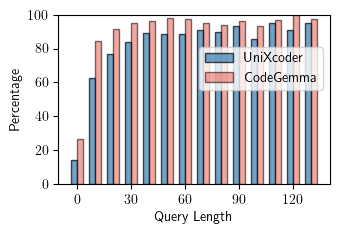

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl


save_path =" "
group_1 = df[df['target_rank'] == 1]
group_others = df[(df['target_rank'] >= 2) & (df['target_rank'] <= 10)]
group_others2 = df[df['target_rank'] > 11]

# Group by target_rank for the second dataset
group_1_df2 = df2[df2['target_rank'] == 1]
group_others_df2 = df2[(df2['target_rank'] >= 2) & (df2['target_rank'] <= 10)]
group_others2_df2 = df2[df2['target_rank'] > 11]

bins = range(0, 150, 10)
hist_1, _ = np.histogram(group_1['target_docstring_length'], bins=bins)
hist_others, _ = np.histogram(group_others['target_docstring_length'], bins=bins)
hist_others2, _ = np.histogram(group_others2['target_docstring_length'], bins=bins)

# Calculate frequencies for each bin for the second dataset
hist_1_df2, _ = np.histogram(group_1_df2['target_docstring_length'], bins=bins)
hist_others_df2, _ = np.histogram(group_others_df2['target_docstring_length'], bins=bins)
hist_others2_df2, _ = np.histogram(group_others2_df2['target_docstring_length'], bins=bins)

total_hist = hist_1 + hist_others + hist_others2
hist_1 = hist_1 / total_hist * 100
hist_others = hist_others / total_hist * 100
hist_others2 = hist_others2 / total_hist * 100

total_hist_df2 = hist_1_df2 + hist_others_df2 + hist_others2_df2
hist_1_df2 =  hist_1_df2/total_hist_df2* 100

colors = [
    (231/255, 98/255, 84/255),
    (239/255, 138/255, 71/255),
    (247/255, 170/255, 88/255),
    (255/255, 208/255, 111/255),
    (255/255, 230/255, 183/255),
    (170/255, 220/255, 224/255),
    (114/255, 188/255, 213/255),
    (82/255, 143/255, 173/255),
    (55/255, 103/255, 149/255),
    (30/255, 70/255, 110/255),
    (226/255, 129/255, 135/255),
    (61/255, 159/255, 60/255),
    (54/255, 125/255, 176/255)
]

color_1 = colors[0] 
color_2 = colors[-1] 

mpl.rcParams['font.sans-serif'] = 'Times New Roman'
mpl.rcParams['text.usetex'] = True
mpl.rcParams['axes.unicode_minus'] = False
fig, ax = plt.subplots(figsize=(3.5, 2.2))

bar_width = 3.5
plt.bar(np.array(bins[:-1]) - bar_width/2, hist_1, width=bar_width, color=color_2, edgecolor='black', label='UniXcoder', align='center', alpha=0.7)
plt.bar(np.array(bins[:-1]) + bar_width/2, hist_1_df2 , width=bar_width, color=color_1, edgecolor='black', label='CodeGemma', align='center', alpha=0.55)
plt.legend(loc='upper right', bbox_to_anchor=(1, 0.85))

plt.title('')
plt.xlabel('Query Length')
plt.ylabel('Percentage')

plt.xticks(np.arange(0, 150, 30))
plt.ylim(0, 100)  

plt.savefig(save_path, format='pdf', bbox_inches='tight')
plt.show()


In [2]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
from matplotlib import rcParams
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes


save_path =""
filtered_df = df[(df['target_docstring_length'] <= 10)  &  (df['target_code_length'] <= 50)]

mpl.rcParams['font.sans-serif'] = 'Times New Roman'
mpl.rcParams['text.usetex'] = True
mpl.rcParams['axes.unicode_minus'] = False

differences = []
for _, row in filtered_df.iterrows():
    target_code_length = row['target_code_length']
    top_ranked = row['top_ranked']
    top_10_code_lengths = [item['code_length'] for item in top_ranked[:10] if 'code_length' in item]
    if top_10_code_lengths:
        avg_top_10_code_length = np.mean(top_10_code_lengths)
        difference = avg_top_10_code_length - target_code_length
        differences.append(difference)

bins = range(-50, 200, 10)
hist, bin_edges = np.histogram(differences, bins=bins)

fig, ax = plt.subplots(figsize=(3.5, 2.2)) 
bars = plt.bar(bin_edges[:-1], hist, width=8, alpha=0.7, color=(247/255, 170/255, 88/255))

# ax.set_title('Histogram')
ax.set_xlabel('Difference in Code Length')
ax.set_ylabel('Frequency')

ax.set_xticks(np.arange(-40, 201, 40))
ax.set_xlim(-50, 200)

ax.set_yticks(np.arange(0, 91, 10))
ax.grid(axis='y', linestyle='--', alpha=0.7)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


# plt.savefig('histogram.png', dpi=600, bbox_inches='tight', pad_inches=0.0)
plt.savefig(save_path, bbox_inches='tight')

plt.show()



NameError: name 'df' is not defined